In [92]:
import numpy as np
import pandas as pd
import os, shutil
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

try:
    !mkdir saved_model
    !mkdir saved_components
except Exception as e:
    print(e)

mkdir: cannot create directory ‘saved_model’: File exists
mkdir: cannot create directory ‘saved_components’: File exists


In [93]:
os.listdir(), os.listdir('churn_dataset/')

(['Churn_modeling.ipynb',
  'app.py',
  '.git',
  '__pycache__',
  'Preprocessed_churn_dataset.csv',
  '.gitignore',
  'Saved_components',
  'Churn_Modelling_Hyperparameter_tuning_DeepLearning.ipynb',
  '.ipynb_checkpoints',
  'README.md',
  'test.py',
  '=4.2.0',
  'saved_components',
  'saved_model',
  'Static',
  'Preprocess.py',
  'churn_dataset'],
 ['Churn_Modelling.csv'])

In [94]:
data = pd.read_csv('./churn_dataset/Churn_Modelling.csv')

In [95]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1427,1428,15799966,Chigolum,792,Germany,Female,59,9,101609.77,1,0,0,161479.19,1
8237,8238,15737275,Conti,649,France,Male,39,3,113096.41,1,1,1,60335.24,0
7483,7484,15784526,Chen,616,France,Male,44,5,102016.38,1,0,1,178235.37,1
3955,3956,15695168,Bruce,625,France,Male,39,2,0.00,2,1,0,100403.05,0
2108,2109,15634949,Hay,593,Germany,Male,74,5,161434.36,2,1,1,65532.17,0


In [96]:
data.shape

(10000, 14)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [98]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [99]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [107]:
# Surname, Rownumber and CustomerID does not have to do anything with response
X = data.drop(['Surname','RowNumber','CustomerId','Exited'],axis = 1)
y = data.Exited

In [108]:
# setting categorical and numerical columns
cat_cols = X.select_dtypes('object').columns
num_cols = X.select_dtypes('number').columns

In [109]:
cat_cols, num_cols

(Index(['Geography', 'Gender'], dtype='object'),
 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary'],
       dtype='object'))

## Column Transformer

In [110]:
# Encoding categorical values
X = data.drop(['Surname','RowNumber','CustomerId','Exited'],axis = 1)
y = data.Exited
ohe = OneHotEncoder(sparse=False)
scaler = MinMaxScaler()

In [111]:
coltrans = ColumnTransformer([('scaler', scaler, num_cols),
                             ('ohencoder', ohe, cat_cols)],remainder= 'passthrough'
                            )

In [112]:
feature_space = coltrans.fit_transform(X)

In [113]:
feature_space.shape

(10000, 13)

In [116]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [253]:
# Converting to PD dataframe
names = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary',1,2,3,'a','b']
df = pd.DataFrame(feature_space, columns=names)
df['exited'] = y

int_cols = ['HasCrCard','IsActiveMember', 1,2,3,'a','b', 'exited']
float_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for i in int_cols:
    df[i] = df[i].astype('int16')
for j in float_cols:
    df[j] = df[j].astype('float32')
    

# Saving the preprocessed Data
df.to_csv('Preprocessed_churn_dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float32
 1   Age              10000 non-null  float32
 2   Tenure           10000 non-null  float32
 3   Balance          10000 non-null  float32
 4   NumOfProducts    10000 non-null  float32
 5   HasCrCard        10000 non-null  int16  
 6   IsActiveMember   10000 non-null  int16  
 7   EstimatedSalary  10000 non-null  float32
 8   1                10000 non-null  int16  
 9   2                10000 non-null  int16  
 10  3                10000 non-null  int16  
 11  a                10000 non-null  int16  
 12  b                10000 non-null  int16  
 13  exited           10000 non-null  int16  
dtypes: float32(6), int16(8)
memory usage: 390.8 KB


## Outlier removal

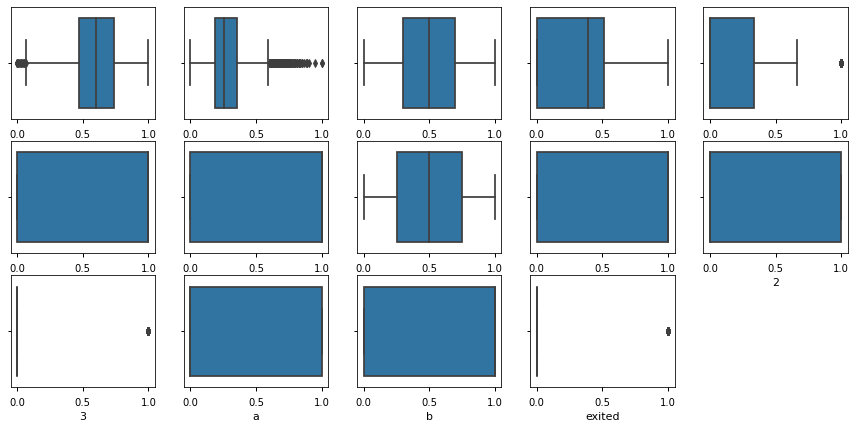

In [254]:
# Looking for outliers
plt.figure(figsize=(15,7))
i = 1
for col in df.columns:
    plt.subplot(3,5,i)
    sns.boxplot(data=df, x = col, hue = 'exited')
    i += 1

In [255]:
# Removing the Outliers

from sklearn.covariance import EllipticEnvelope
import warnings
warnings.filterwarnings('ignore')

out_rem = EllipticEnvelope(contamination=.1,random_state=33)
mask = out_rem.fit_predict(df)

In [256]:
mask = np.where(mask != 1,True, False)
df['isoutlier'] = mask

In [257]:
df_no_outlier = df[df.isoutlier == False]
df_no_outlier.drop('isoutlier',axis = 1, inplace=True)

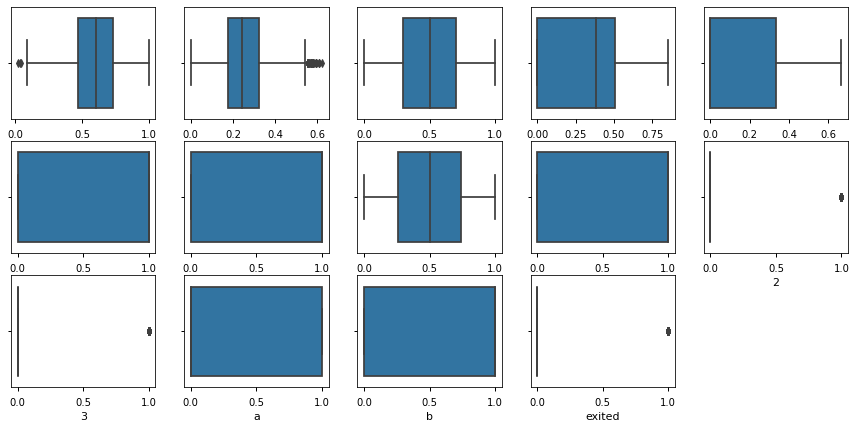

In [258]:
# Looking for outliers again to check the difference
plt.figure(figsize=(15,7))
i = 1
for col in df_no_outlier.columns:
    plt.subplot(3,5,i)
    sns.boxplot(data=df_no_outlier, x = col)
    i += 1

## Setting response and feature dataframe separate

In [259]:
XX = df_no_outlier.drop('exited', axis = 1)
yy = df_no_outlier.exited

## Checking for class imbalance

In [260]:
df_no_outlier.exited.value_counts()

0    7486
1    1514
Name: exited, dtype: int64

In [261]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()


# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(XX, yy)


print(f'Original data: X = {XX.shape}, {yy.shape}')
print(yy.value_counts())
print(f'Oversampled data: X = {x_smote.shape}, {y_smote.shape}')
print(y_smote.value_counts())


Original data: X = (9000, 13), (9000,)
0    7486
1    1514
Name: exited, dtype: int64
Oversampled data: X = (14972, 13), (14972,)
1    7486
0    7486
Name: exited, dtype: int64


## Creating train and test set

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
xtrain, xtest, ytrain, ytest = train_test_split(x_smote, y_smote, test_size=.1, random_state= 33)

In [264]:
xtrain.shape

(13474, 13)

## Creating a DL model

In [265]:
import os
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2' # ignores tf wanrings and red notes
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten

#Enable Gpu
physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(len(physical_devices))


0


In [363]:
# Model intanciation
Model = keras.models.Sequential()
Model.add(Flatten())

# Model.add(keras.layers.Input(13))

Model.add(Dense( units = 100, activation = 'relu'))
# Model.add(Dropout(.2))

Model.add(Dense( units = 50, activation= 'relu'))
# Model.add(Dropout(.2))

Model.add(Dense( units = 30, activation= 'relu'))
# Model.add(Dropout(.2))

Model.add(Dense( units = 10, activation= 'relu'))


Model.add(Dense(units=1, activation='sigmoid'))

In [364]:
METRICS = [
      # keras.metrics.TruePositives(name='tp'),
      # keras.metrics.FalsePositives(name='fp'),
      # keras.metrics.TrueNegatives(name='tn'),
      # keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [365]:
Model.compile(optimizer= keras.optimizers.Adam(), loss='binary_crossentropy', metrics = METRICS)

In [366]:
model_history = Model.fit(xtrain, ytrain, batch_size= 300, epochs= 300, validation_split=.1)

Epoch 1/300
41/41 [==============================] - 2s 33ms/step - loss: 0.6757 - accuracy: 0.5836 - precision: 0.5608 - recall: 0.8216 - auc: 0.6296 - prc: 0.6226 - val_loss: 0.6102 - val_accuracy: 0.6714 - val_precision: 0.6988 - val_recall: 0.6501 - val_auc: 0.7322 - val_prc: 0.7510
Epoch 2/300
41/41 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7001 - precision: 0.7047 - recall: 0.6937 - auc: 0.7593 - prc: 0.7459 - val_loss: 0.5205 - val_accuracy: 0.7352 - val_precision: 0.7522 - val_recall: 0.7340 - val_auc: 0.8203 - val_prc: 0.8454
Epoch 3/300
41/41 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.7366 - precision: 0.7369 - recall: 0.7382 - auc: 0.8090 - prc: 0.8020 - val_loss: 0.5080 - val_accuracy: 0.7574 - val_precision: 0.7725 - val_recall: 0.7582 - val_auc: 0.8285 - val_prc: 0.8523
Epoch 4/300
41/41 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7446 - precision: 0.7437 - recall: 0.7464 - 

41/41 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8076 - precision: 0.7967 - recall: 0.8230 - auc: 0.8858 - prc: 0.8705 - val_loss: 0.4351 - val_accuracy: 0.7930 - val_precision: 0.7775 - val_recall: 0.8450 - val_auc: 0.8794 - val_prc: 0.8853
Epoch 30/300
41/41 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8075 - precision: 0.7902 - recall: 0.8316 - auc: 0.8874 - prc: 0.8735 - val_loss: 0.4650 - val_accuracy: 0.7767 - val_precision: 0.8478 - val_recall: 0.6970 - val_auc: 0.8801 - val_prc: 0.8827
Epoch 31/300
41/41 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.7991 - precision: 0.7947 - recall: 0.8052 - auc: 0.8803 - prc: 0.8651 - val_loss: 0.4280 - val_accuracy: 0.8019 - val_precision: 0.7824 - val_recall: 0.8592 - val_auc: 0.8836 - val_prc: 0.8874
Epoch 32/300
41/41 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8013 - precision: 0.7834 - recall: 0.8340 - auc: 0.887

41/41 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8401 - precision: 0.8251 - recall: 0.8581 - auc: 0.9156 - prc: 0.9045 - val_loss: 0.4018 - val_accuracy: 0.8182 - val_precision: 0.8388 - val_recall: 0.8065 - val_auc: 0.9002 - val_prc: 0.8975
Epoch 58/300
41/41 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8361 - precision: 0.8195 - recall: 0.8577 - auc: 0.9130 - prc: 0.9015 - val_loss: 0.4001 - val_accuracy: 0.8264 - val_precision: 0.8010 - val_recall: 0.8876 - val_auc: 0.9002 - val_prc: 0.8985
Epoch 59/300
41/41 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8290 - precision: 0.8065 - recall: 0.8634 - auc: 0.9135 - prc: 0.9031 - val_loss: 0.3955 - val_accuracy: 0.8346 - val_precision: 0.8117 - val_recall: 0.8890 - val_auc: 0.8999 - val_prc: 0.8994
Epoch 60/300
41/41 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8319 - precision: 0.8107 - recall: 0.8612 - auc: 0.915

41/41 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8600 - precision: 0.8364 - recall: 0.8941 - auc: 0.9319 - prc: 0.9216 - val_loss: 0.3763 - val_accuracy: 0.8205 - val_precision: 0.8405 - val_recall: 0.8094 - val_auc: 0.9130 - val_prc: 0.9090
Epoch 86/300
41/41 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8534 - precision: 0.8404 - recall: 0.8743 - auc: 0.9275 - prc: 0.9180 - val_loss: 0.3715 - val_accuracy: 0.8457 - val_precision: 0.8452 - val_recall: 0.8620 - val_auc: 0.9134 - val_prc: 0.9126
Epoch 87/300
41/41 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8582 - precision: 0.8451 - recall: 0.8768 - auc: 0.9314 - prc: 0.9228 - val_loss: 0.3804 - val_accuracy: 0.8272 - val_precision: 0.8456 - val_recall: 0.8179 - val_auc: 0.9127 - val_prc: 0.9119
Epoch 88/300
41/41 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8599 - precision: 0.8455 - recall: 0.8787 - auc: 0.935

41/41 [==============================] - 0s 3ms/step - loss: 0.2919 - accuracy: 0.8753 - precision: 0.8600 - recall: 0.8921 - auc: 0.9460 - prc: 0.9335 - val_loss: 0.3776 - val_accuracy: 0.8361 - val_precision: 0.8404 - val_recall: 0.8464 - val_auc: 0.9164 - val_prc: 0.9136
Epoch 114/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8751 - precision: 0.8540 - recall: 0.8988 - auc: 0.9455 - prc: 0.9349 - val_loss: 0.3624 - val_accuracy: 0.8442 - val_precision: 0.8363 - val_recall: 0.8720 - val_auc: 0.9181 - val_prc: 0.9093
Epoch 115/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8733 - precision: 0.8512 - recall: 0.9047 - auc: 0.9444 - prc: 0.9356 - val_loss: 0.3664 - val_accuracy: 0.8286 - val_precision: 0.8440 - val_recall: 0.8236 - val_auc: 0.9189 - val_prc: 0.9083
Epoch 116/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8699 - precision: 0.8535 - recall: 0.8888 - auc: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.8775 - precision: 0.8652 - recall: 0.8953 - auc: 0.9499 - prc: 0.9429 - val_loss: 0.3550 - val_accuracy: 0.8494 - val_precision: 0.8463 - val_recall: 0.8691 - val_auc: 0.9221 - val_prc: 0.9132
Epoch 142/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.8845 - precision: 0.8702 - recall: 0.9040 - auc: 0.9539 - prc: 0.9474 - val_loss: 0.3514 - val_accuracy: 0.8539 - val_precision: 0.8494 - val_recall: 0.8748 - val_auc: 0.9241 - val_prc: 0.9125
Epoch 143/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.8916 - precision: 0.8734 - recall: 0.9136 - auc: 0.9576 - prc: 0.9505 - val_loss: 0.3530 - val_accuracy: 0.8531 - val_precision: 0.8380 - val_recall: 0.8905 - val_auc: 0.9211 - val_prc: 0.9112
Epoch 144/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2751 - accuracy: 0.8870 - precision: 0.8714 - recall: 0.9090 - auc: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8904 - precision: 0.8703 - recall: 0.9112 - auc: 0.9575 - prc: 0.9495 - val_loss: 0.3806 - val_accuracy: 0.8338 - val_precision: 0.8690 - val_recall: 0.8023 - val_auc: 0.9237 - val_prc: 0.9138
Epoch 170/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.8895 - precision: 0.8771 - recall: 0.9056 - auc: 0.9555 - prc: 0.9477 - val_loss: 0.3553 - val_accuracy: 0.8487 - val_precision: 0.8519 - val_recall: 0.8592 - val_auc: 0.9270 - val_prc: 0.9197
Epoch 171/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.8936 - precision: 0.8771 - recall: 0.9134 - auc: 0.9602 - prc: 0.9531 - val_loss: 0.3480 - val_accuracy: 0.8591 - val_precision: 0.8628 - val_recall: 0.8677 - val_auc: 0.9285 - val_prc: 0.9197
Epoch 172/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.8954 - precision: 0.8787 - recall: 0.9173 - auc: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.9010 - precision: 0.8867 - recall: 0.9188 - auc: 0.9657 - prc: 0.9590 - val_loss: 0.3667 - val_accuracy: 0.8635 - val_precision: 0.8200 - val_recall: 0.9459 - val_auc: 0.9266 - val_prc: 0.9171
Epoch 198/300
41/41 [==============================] - 0s 3ms/step - loss: 0.2496 - accuracy: 0.8908 - precision: 0.8700 - recall: 0.9166 - auc: 0.9601 - prc: 0.9524 - val_loss: 0.3464 - val_accuracy: 0.8620 - val_precision: 0.8498 - val_recall: 0.8933 - val_auc: 0.9297 - val_prc: 0.9217
Epoch 199/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9016 - precision: 0.8821 - recall: 0.9262 - auc: 0.9646 - prc: 0.9585 - val_loss: 0.3732 - val_accuracy: 0.8524 - val_precision: 0.8631 - val_recall: 0.8521 - val_auc: 0.9232 - val_prc: 0.9125
Epoch 200/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9012 - precision: 0.8854 - recall: 0.9218 - auc: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.9034 - precision: 0.8829 - recall: 0.9305 - auc: 0.9663 - prc: 0.9610 - val_loss: 0.3476 - val_accuracy: 0.8702 - val_precision: 0.8465 - val_recall: 0.9175 - val_auc: 0.9304 - val_prc: 0.9225
Epoch 226/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9049 - precision: 0.8857 - recall: 0.9264 - auc: 0.9662 - prc: 0.9588 - val_loss: 0.3705 - val_accuracy: 0.8546 - val_precision: 0.8403 - val_recall: 0.8905 - val_auc: 0.9259 - val_prc: 0.9191
Epoch 227/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9035 - precision: 0.8825 - recall: 0.9266 - auc: 0.9659 - prc: 0.9590 - val_loss: 0.3756 - val_accuracy: 0.8464 - val_precision: 0.8636 - val_recall: 0.8378 - val_auc: 0.9239 - val_prc: 0.9139
Epoch 228/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.9042 - precision: 0.8894 - recall: 0.9243 - auc: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9167 - precision: 0.9012 - recall: 0.9353 - auc: 0.9731 - prc: 0.9685 - val_loss: 0.3707 - val_accuracy: 0.8598 - val_precision: 0.8630 - val_recall: 0.8691 - val_auc: 0.9273 - val_prc: 0.9170
Epoch 254/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9114 - precision: 0.8946 - recall: 0.9320 - auc: 0.9708 - prc: 0.9656 - val_loss: 0.3697 - val_accuracy: 0.8568 - val_precision: 0.8632 - val_recall: 0.8620 - val_auc: 0.9296 - val_prc: 0.9216
Epoch 255/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9149 - precision: 0.8979 - recall: 0.9378 - auc: 0.9712 - prc: 0.9669 - val_loss: 0.3726 - val_accuracy: 0.8553 - val_precision: 0.8703 - val_recall: 0.8492 - val_auc: 0.9282 - val_prc: 0.9174
Epoch 256/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9103 - precision: 0.8935 - recall: 0.9336 - auc: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9261 - precision: 0.9070 - recall: 0.9482 - auc: 0.9761 - prc: 0.9719 - val_loss: 0.3599 - val_accuracy: 0.8694 - val_precision: 0.8340 - val_recall: 0.9360 - val_auc: 0.9321 - val_prc: 0.9195
Epoch 282/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9071 - precision: 0.8863 - recall: 0.9337 - auc: 0.9676 - prc: 0.9612 - val_loss: 0.3751 - val_accuracy: 0.8635 - val_precision: 0.8734 - val_recall: 0.8634 - val_auc: 0.9307 - val_prc: 0.9222
Epoch 283/300
41/41 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9190 - precision: 0.9025 - recall: 0.9370 - auc: 0.9742 - prc: 0.9692 - val_loss: 0.3699 - val_accuracy: 0.8687 - val_precision: 0.8407 - val_recall: 0.9232 - val_auc: 0.9269 - val_prc: 0.9121
Epoch 284/300
41/41 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9123 - precision: 0.8919 - recall: 0.9345 - auc: 0.

In [367]:
print(Model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 13)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_63 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_64 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_65 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 11        
Total params: 8,301
Trainable params: 8,301
Non-trainable params: 0
___________________________________________________

In [368]:
dd = pd.DataFrame(model_history.history)
# dd.sort_values('val_precision', ascending=False)

In [369]:
# for i in dd.columns:
    
#     plt.plot(dd[i], label = i)
#     plt.legend()


In [370]:
to_plot = ['val_loss','val_accuracy','val_precision','val_recall', 'val_auc','val_prc']

In [371]:
import plotly.express as px

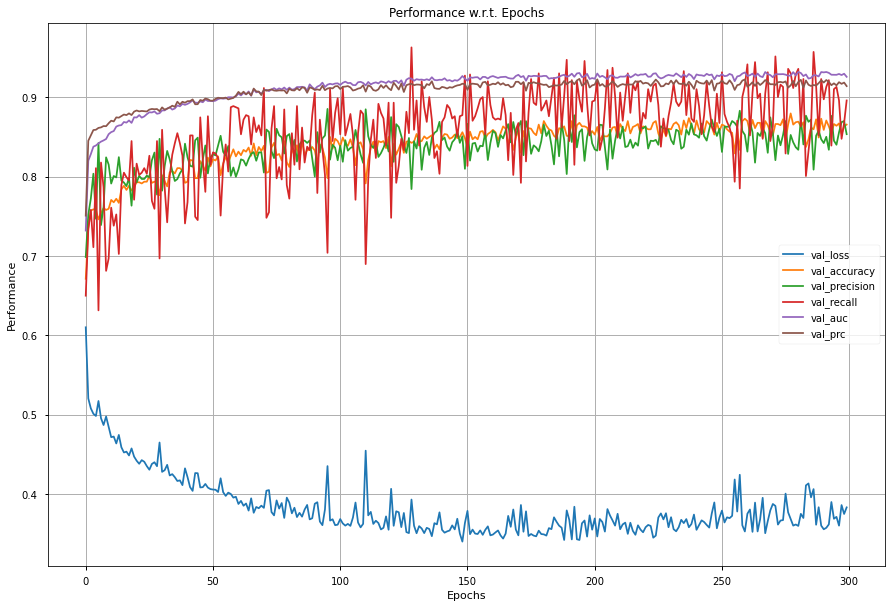

In [372]:
plt.figure(figsize=(15,10))
plt.style.use('seaborn-notebook')
plt.grid()

plt.title('Performance w.r.t. Epochs')
for i in to_plot:
    plt.plot(dd[i], label = i)
    plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.savefig('./Saved_components/Performance_Model.jpg', bbox_inches='tight')
plt.show()


In [373]:
from sklearn.metrics import  confusion_matrix

In [374]:
ypred = Model.predict(xtest)
ypred = np.around(ypred)

In [375]:
def all_metrics(y_true, y_pred, heatmap = True):
    from sklearn.metrics import f1_score, precision_score, recall_score,roc_auc_score, confusion_matrix
    print('f1 score: ',f1_score(y_true, y_pred))
    print( 'precision score: ', precision_score(y_true, y_pred))
    print('recall score: ',recall_score(y_true,y_pred))
    auc = roc_auc_score(y_true, y_pred)
    print('AUC: %.3f' % auc)
    if heatmap:
        sns.heatmap(confusion_matrix(y_true, y_pred), annot=True,cmap='Blues', fmt='g')
    else:
        print(confusion_matrix(y_true, y_pred))

f1 score:  0.8756476683937823
precision score:  0.8513853904282116
recall score:  0.9013333333333333
AUC: 0.872


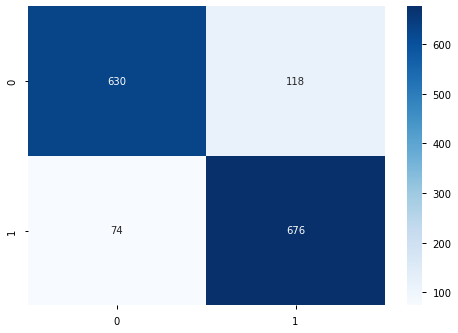

In [376]:
all_metrics(ytest,ypred)

## Saving the Model

In [377]:
# Saving the Model
Model.save('./saved_model/my_model.h5')


# Lets see other Model

In [198]:
from sklearn.linear_model import LogisticRegression

In [285]:
log = LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [286]:
ypreddd = log.predict(xtest)

f1 score:  0.7490039840637451
precision score:  0.746031746031746
recall score:  0.752
AUC: 0.748


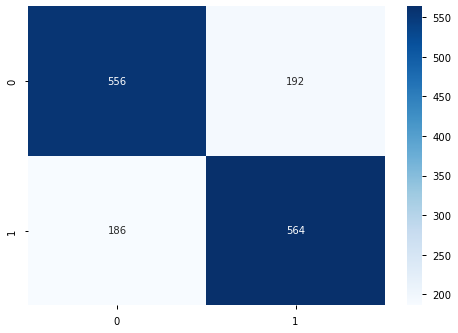

In [287]:
all_metrics(ytest,ypreddd)

In [379]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()
extra.fit(xtrain, ytrain)

ExtraTreesClassifier()

In [380]:
extra_pred = extra.predict(xtest)

f1 score:  0.9234793982995423
precision score:  0.9062901155327343
recall score:  0.9413333333333334
AUC: 0.922


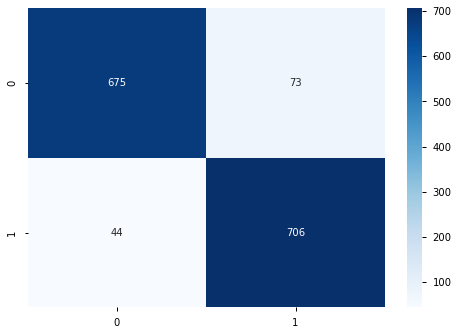

In [381]:
all_metrics(ytest, extra_pred)